In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot

In [ ]:
base_path = r'/content/drive/My Drive'
folder_path = 'chest_xray'
subfolder_path = 'chest_xray/train/PNEUMONIA'
file_name = 'person1_bacteria_1.jpeg'

# Use os.path.join() to handle the path
path = os.path.join(base_path, folder_path, subfolder_path, file_name)
image_pneumonia = PIL.Image.open(path)

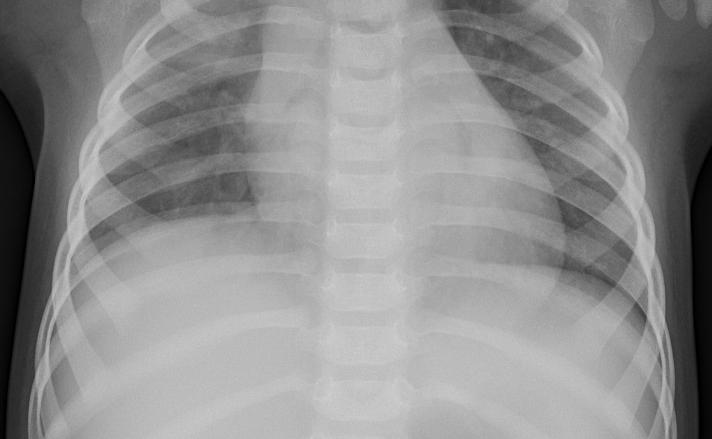

In [ ]:
image_pneumonia

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/val'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/chest_xray/train/*')
x = Flatten()(vgg.output)

NameError: name 'glob' is not defined

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 631 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
522/522 [==============================] - 604s 1s/step - loss: 0.2027 - accuracy: 0.9287 - val_loss: 0.3258 - val_accuracy: 0.9160
Epoch 2/5
522/522 [==============================] - 138s 264ms/step - loss: 0.1391 - accuracy: 0.9551 - val_loss: 0.4128 - val_accuracy: 0.8938
Epoch 3/5
522/522 [==============================] - 137s 262ms/step - loss: 0.1244 - accuracy: 0.9597 - val_loss: 0.5099 - val_accuracy: 0.8970
Epoch 4/5
522/522 [==============================] - 137s 262ms/step - loss: 0.1563 - accuracy: 0.9574 - val_loss: 0.4723 - val_accuracy: 0.9239
Epoch 5/5
522/522 [==============================] - 138s 265ms/step - loss: 0.1056 - accuracy: 0.9682 - val_loss: 0.6105 - val_accuracy: 0.8922


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('/content/drive/MyDrive/chest_xray/chest_xray_vgg.keras')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
base_model=load_model('/content/drive/MyDrive/chest_xray/chest_xray_vgg.keras')